# Recovering weak signals

In [1]:
import numpy as np
import corner
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import lightkurve as lk

In [2]:
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

Sometimes a signal is too weak to be obvious in the `first_look`. There are a few ways to dig deeper. One of those is the time delay periodogram module, which essentially brute forces a model for a range of orbital periods. The likelihood of the model can then be plotted against the orbital periods, and should peak at the correct value. 

Let's try this out for a short period binary, KIC~6780873

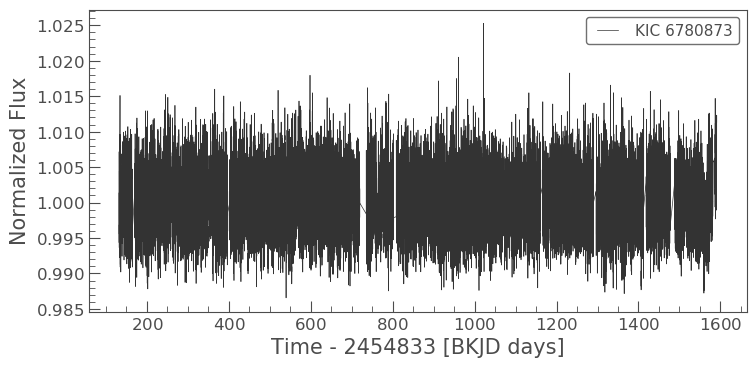

In [3]:
lc = lk.search_lightcurvefile('KIC 6780873', mission='Kepler').download_all().PDCSAP_FLUX.stitch().remove_nans()
lc.plot();

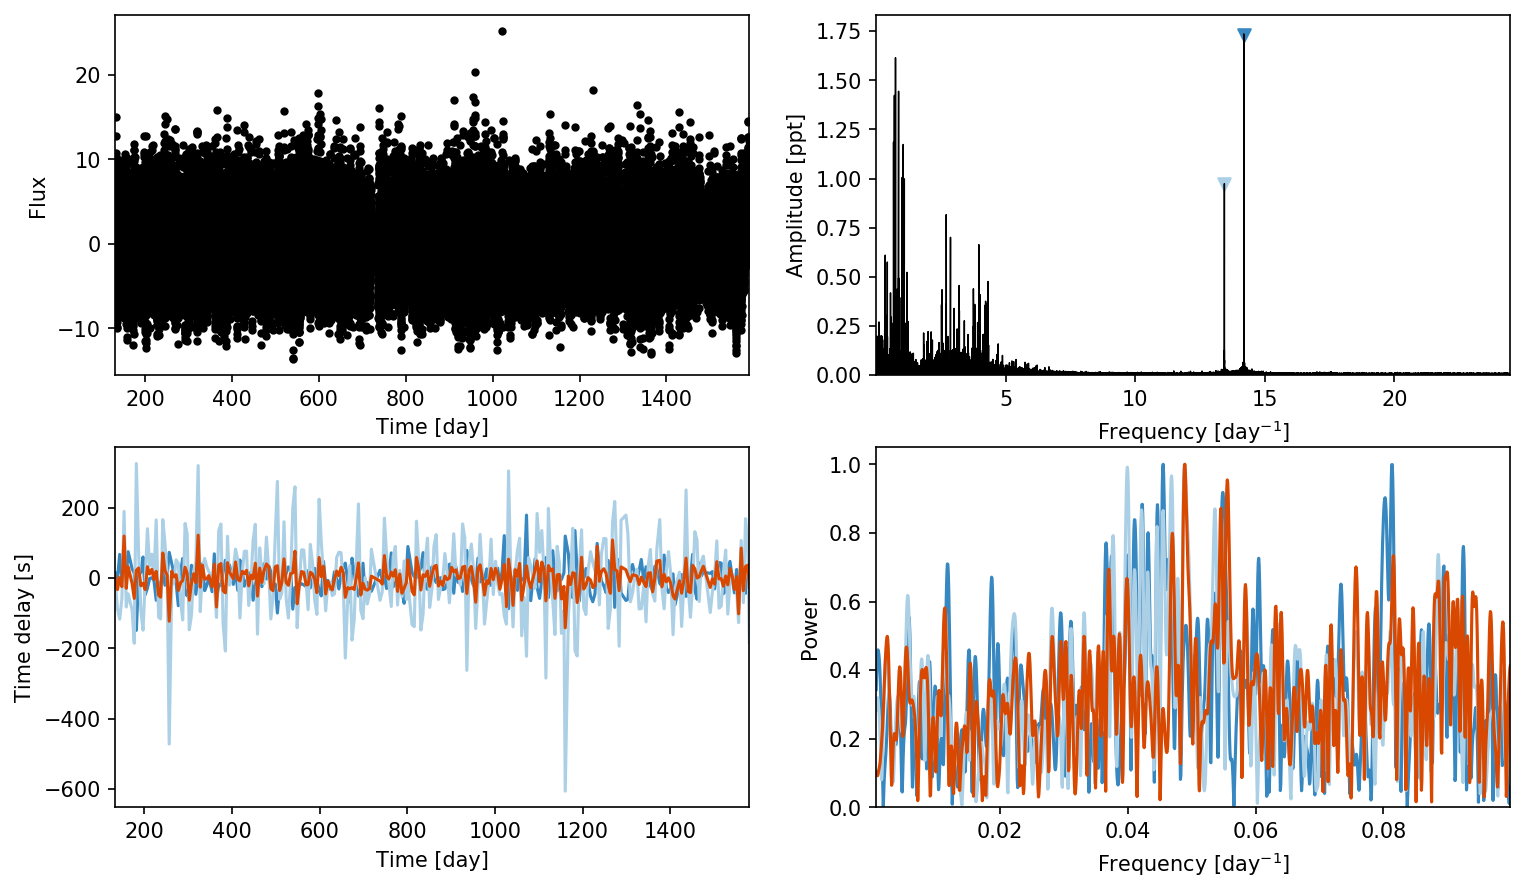

In [5]:
from maelstrom import Maelstrom

ms = Maelstrom(lc.time, lc.flux, max_peaks=2, fmin=10)
ms.first_look(segment_size=5);

It does look like there's something there.. but it's hard to tell. Let's create the periodogram searcher:

In [7]:
pg = ms.period_search()

We'll search between 5 and 15 days

In [8]:
periods = np.linspace(5,15,100)
res = pg.fit(periods)

100%|██████████| 100/100 [03:09<00:00,  1.89s/it]


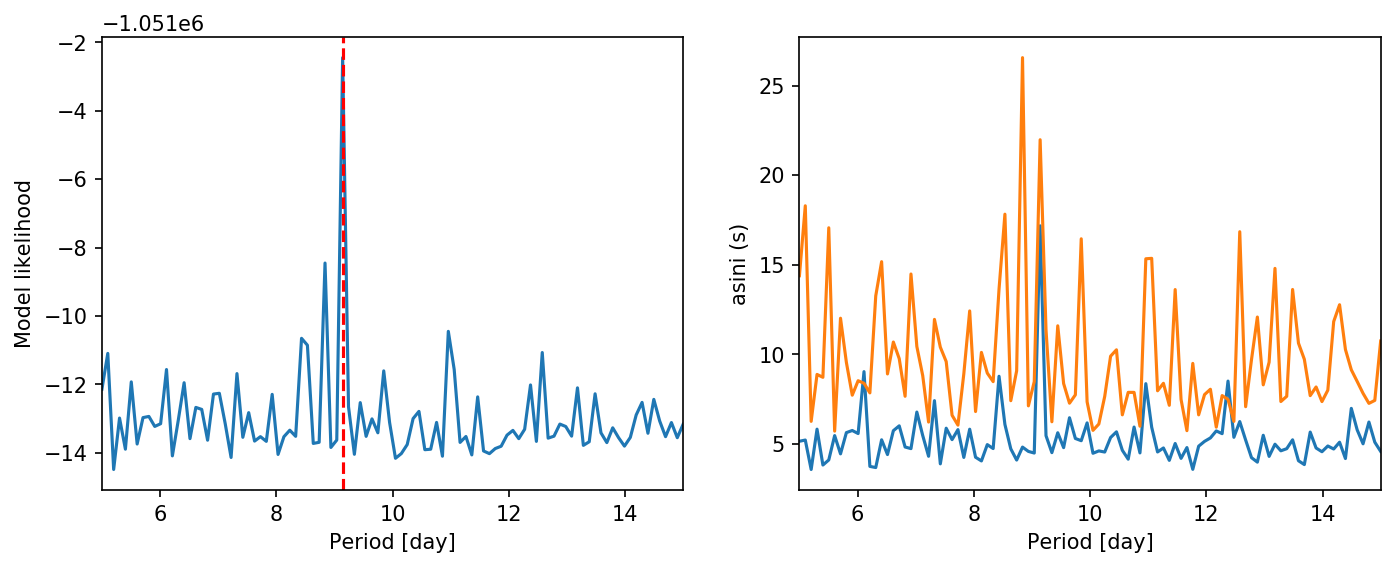

In [10]:
pg.diagnose();

Cool, there's a peak at the orbital period of ~9 days! This is almost exactly where we know it to be. The contents of the pg.fit results are a list of optimisation dict results. If we want to make these plots manually, we can do the following:

Expected orbital period at 9.14 days


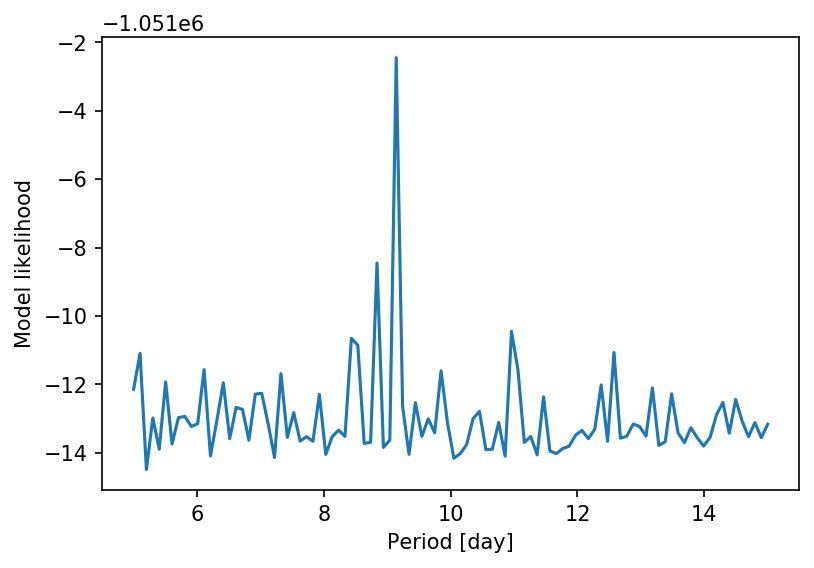

In [15]:
ys = np.array([[r[0] for r in row] for row in res])
sm = np.sum(ys, axis=0)
plt.plot(periods, sm)
period = periods[np.argmax(sm)]
plt.xlabel('Period [day]')
plt.ylabel('Model likelihood')

print(f"Expected orbital period at {period:.2f} days")